In [1]:
import pandas as pd
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine
from snowflake.connector.pandas_tools import pd_writer
import time

In [2]:

start_time = time.time()
 
engine = create_engine(URL(
                    account = 'fkdeeyq-lh23209',
                    user = 'sushma',
                    password = '***********',
                    database = 'demo',
                    schema = 'public',
                    warehouse = 'demo_wh'))

with engine.connect() as conn:
    try:
        query = """ select * from OTODOM_DATA_TRANSFORMED """
        
        print("--- %s seconds ---" % (time.time() - start_time))
        
        df = pd.read_sql(query,conn)


        #df = pd.read_csv('/Users/thoufiq/DEV/Python_2023_Cohort1/Project/Dataset/Otodom_Data_ALL.csv')

        print(df.head()) 
        print(df.shape) 

        #df.columns = map(lambda x: str(x).upper(), df.columns)
        
        #df.to_sql('otodom_data_py', con=engine, if_exists='replace', index=False, chunksize=16000, method=pd_writer)
    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

print("--- FINAL --- %s seconds ---" % (time.time() - start_time))

--- 3.8884315490722656 seconds ---
       rn advertiser_type balcony_garden_terrace  \
0  307011        business                    Ask   
1  307014        business                    Ask   
2  307017        business                Balcony   
3  307023        business                    Ask   
4  307027        business                Balcony   

                                         description     heating is_for_sale  \
0  Oferuje w pełni wyposażony i umeblowany aparta...         Ask       FALSE   
1  Zapraszam do zakupu wyjątkowej nieruchomości m...         Ask        TRUE   
2  | Przestronne 3 pokojowe mieszkanie w kamienic...  electrical        TRUE   
3  Proponujemy do sprzedaży dom szeregowy, położo...         Ask        TRUE   
4  Na sprzedaż wyjątkowe mieszkanie o powierzchni...       urban        TRUE   

  lighting                                           location  \
0      Ask           Longitude: 21.03738 | Latitude: 52.22552   
1      Ask           Longitude: 21.05901 

       city  avg_rent_1r  avg_rent_2r  avg_rent_3r  avg_rent_4r
0  Warszawa      2763.49      4219.87      6924.58     12533.66
1   Wrocław      2428.07      3108.77      4491.62      7160.99
2    Kraków      2394.79      3024.76      4234.96      6514.03
3    Gdańsk      2374.17      2930.99      4452.33      6170.89
4  Katowice      1716.44      2335.50      3156.23      5494.10
--- FINAL --- 1030.3298082351685 seconds ---


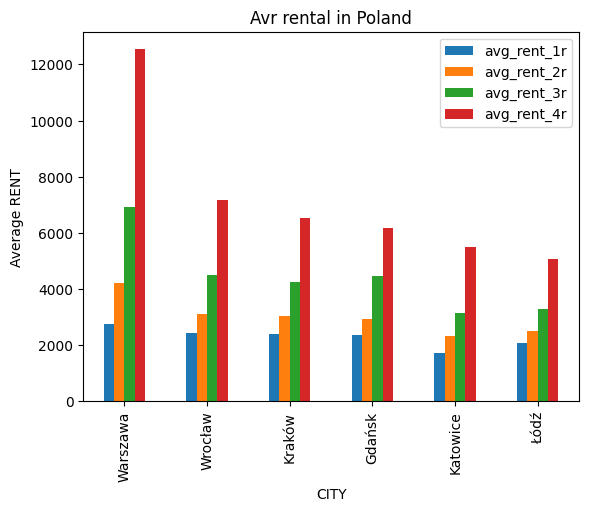

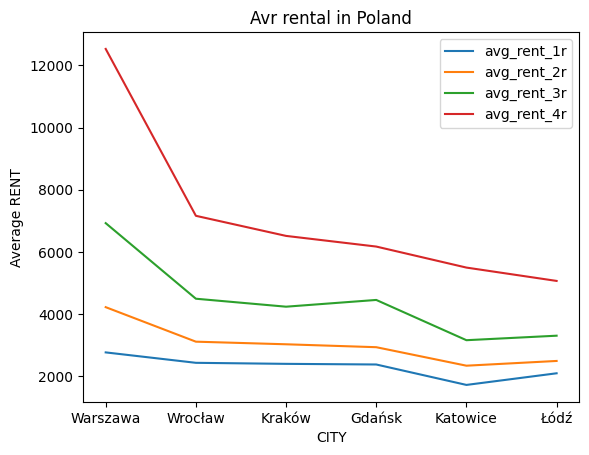

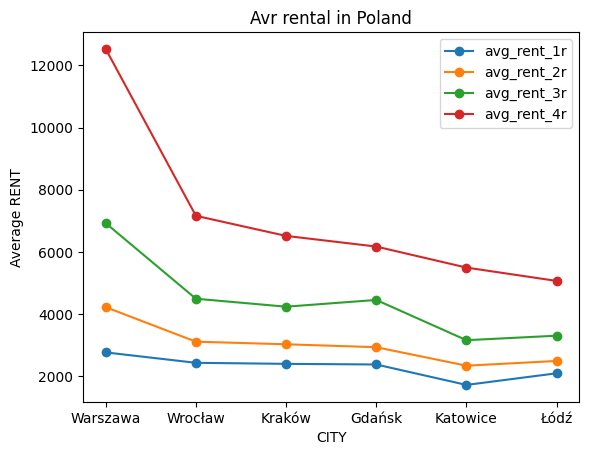

In [9]:
with engine.connect() as conn:
    try:
        query = """ select city, round(avg_rent_1R,2) as avg_rent_1R
                    , round(avg_rent_2R,2) as avg_rent_2R, round(avg_rent_3R,2) as avg_rent_3R
                    , round(avg_rent_4R,2) as avg_rent_4R
                    from (
                        select city,no_of_rooms,price_new
                        from OTODOM_DATA_TRANSFORMED
                        where city in ('Warszawa', 'Wrocław', 'Kraków', 'Gdańsk', 'Katowice', 'Łódź')
                        and apartment_flag = 'apartment'
                        and lower(is_for_sale)='false' 
                        and no_of_rooms in (1,2,3,4)) x
                    pivot 
                        (
                            avg(price_new)
                            for no_of_rooms in ('1','2','3','4')
                        ) 
                        as p(city,avg_rent_1R, avg_rent_2R, avg_rent_3R, avg_rent_4R)
                    order by avg_rent_4R desc  """
        
        df = pd.read_sql(query,conn)
        print(df.head())

        
        df.plot.bar(x="city", y=["avg_rent_1r","avg_rent_2r","avg_rent_3r","avg_rent_4r"]
                      ,  title="Avr rental in Poland", xlabel='CITY', ylabel='Average RENT');

        df.plot(x="city", y=["avg_rent_1r","avg_rent_2r","avg_rent_3r","avg_rent_4r"]
                      ,  title="Avr rental in Poland", xlabel='CITY', ylabel='Average RENT');

        df.plot(x="city", y=["avg_rent_1r","avg_rent_2r","avg_rent_3r","avg_rent_4r"]
                      ,  title="Avr rental in Poland", xlabel='CITY', ylabel='Average RENT'
                      , marker='o');

        #plot.show();

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

print("--- FINAL --- %s seconds ---" % (time.time() - start_time))

           suburb  no_of_apartments
0       Białołęka                23
1           Wawer                16
2  Praga-Południe                10
3          Włochy                 7
4        Targówek                 6
--- FINAL --- 1507.675142288208 seconds ---


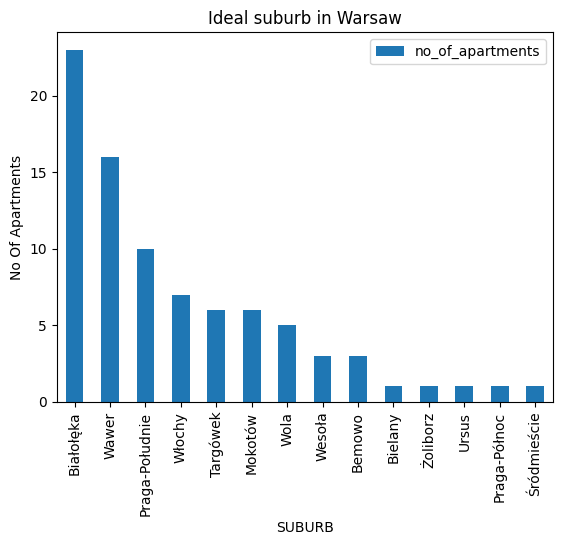

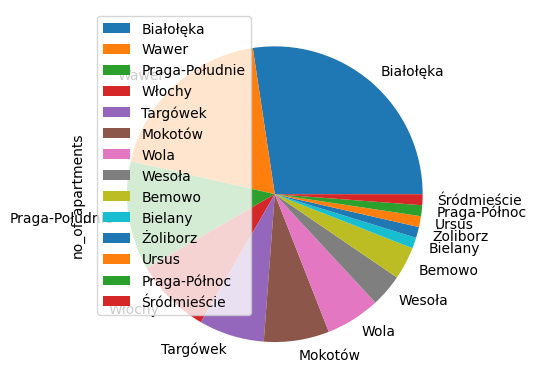

In [13]:
with engine.connect() as conn:
    try:
        query = """ select suburb, count(1) as no_of_apartments
                	from otodom_data_transformed
                	where city in ('Warszawa')
                	and apartment_flag = 'apartment'
                	and lower(is_for_sale) = 'true'
                	and surface_new between 90 and 100
                	and price_new between 800000 and 1000000
                	group by suburb
                	order by count(1)  desc;  """
        
        df = pd.read_sql(query,conn)
        print(df.head())

        
        df.plot.bar(x="suburb", y="no_of_apartments"
                      ,  title="Ideal suburb in Warsaw", xlabel='SUBURB', ylabel='No Of Apartments');

        lbl = df["suburb"]
        df.plot.pie(y="no_of_apartments",labels=lbl)

        #plot.show();

    except Exception as e:
        print('--- Error --- ',e)
    finally:
        conn.close()
engine.dispose()

print("--- FINAL --- %s seconds ---" % (time.time() - start_time))